#Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

#Loading the dataset and dataframe transformation

In [ ]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


#Adding the date column

In [ ]:
df["Date"] = pd.date_range(start="1/1/1980", periods=20640)

In [ ]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,Date
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1980-01-01
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1980-01-02
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1980-01-03
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1980-01-04
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1980-01-05
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,2036-06-30
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,2036-07-01
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,2036-07-02
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,2036-07-03


#Counting and/or removing Null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   MedInc      20640 non-null  float64       
 1   HouseAge    20640 non-null  float64       
 2   AveRooms    20640 non-null  float64       
 3   AveBedrms   20640 non-null  float64       
 4   Population  20640 non-null  float64       
 5   AveOccup    20640 non-null  float64       
 6   Latitude    20640 non-null  float64       
 7   Longitude   20640 non-null  float64       
 8   target      20640 non-null  float64       
 9   Date        20640 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.6 MB


There aren't any nulls but if there were we would use .dropna()

#Making the dataframe which we will work with, data becomes index and the column which we want to predict

In [ ]:
df1 = df[['Date', 'AveRooms']]
df1.set_index('Date', inplace=True)

In [ ]:
df1.head()

,AveRooms
Date,
1980-01-01,6.984127
1980-01-02,6.238137
1980-01-03,8.288136
1980-01-04,5.817352
1980-01-05,6.281853


##Plotting the new dataframe

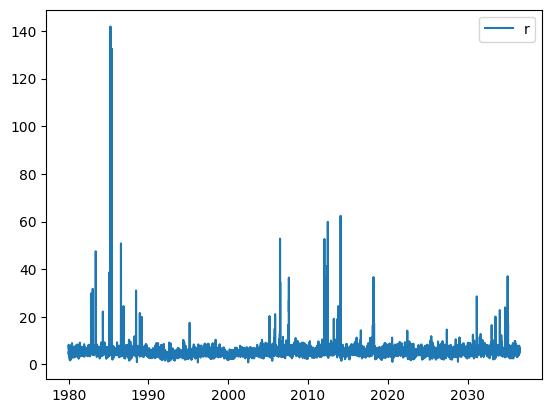

In [ ]:
plt.plot(df1.index, df1)
plt.legend('right-corner')

#Train Test Split by hand

##Partitioning 80-20 for train test

len df1 = cate randuri sunt in dataframe
df1 train are toate randule de la inceput pana la 80%
df1 test are de la 80% pana la sf

In [ ]:
n_observations = len(df1)
df1_train = df1.iloc[:int(0.8 * n_observations)]
df1_test = df1.iloc[int(0.8 * n_observations):]

##Plotting to see the two differences

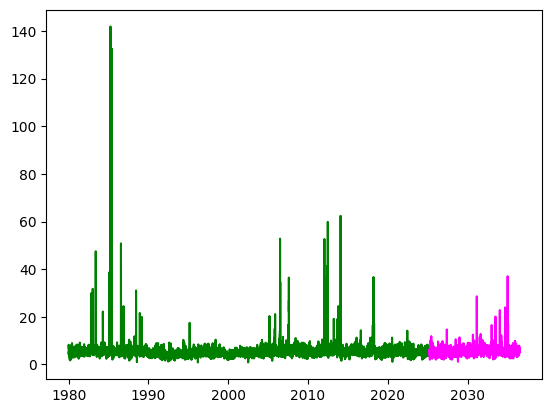

In [ ]:
_ = plt.plot(dpi=150)
plt.plot(df1_train.index, df1_train, c="green")
plt.plot(df1_test.index, df1_test, c="magenta")
plt.show()

##The actual train test split

In [ ]:
X_train = df1_train.index.values
y_train = df1_train.values

X_test = df1_test.index.values
y_test = df1_test.values

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16512,), (16512, 1), (4128,), (4128, 1))

#Scaling and Plotting the Scaled

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

# Apply transform to both the training set and the test set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_train_scaled)

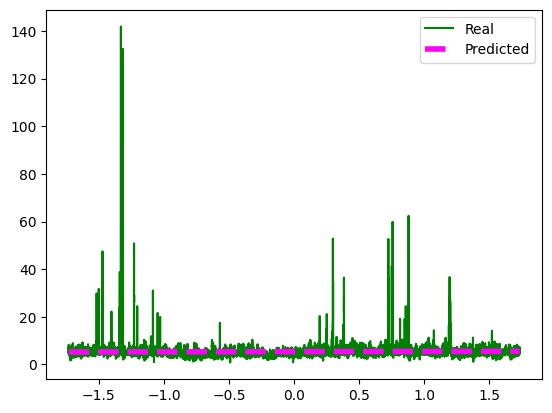

In [ ]:
_ = plt.plot(dpi=150)
plt.plot(X_train_scaled, y_train, c="green", label="Real")
plt.plot(X_train_scaled, y_pred_scaled, c="magenta", label="Predicted", linestyle="dashed", linewidth=4)
plt.legend(loc="upper right")
plt.show()

#Converting the index date to timestamp and to 1D array

In [ ]:
# Convert values to Python datetime objects
X_train = pd.to_datetime(X_train)

# Convert Python datetime to timestamp
X_train = [x.timestamp() for x in X_train]

# Convert the timestamp list into an np.array
X_train = np.array(X_train)

# Reshape into a single dependent variable format (as required by scikit-learn)
X_train = X_train.reshape(-1, 1)

# Convert values to Python datetime objects
X_test = pd.to_datetime(X_test)

# Convert Python datetime to timestamp
X_test = [x.timestamp() for x in X_test]

# Convert the timestamp list into an np.array
X_test = np.array(X_test)

# Reshape into a single dependent variable format (as required by scikit-learn)
X_test = X_test.reshape(-1, 1)

X_train[0], X_test[0]

(array([3.155328e+08]), array([1.7421696e+09]))

#Linear Regression

##Fitting the model

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

##Prediction of the model

In [ ]:
y_pred = model.predict(X_train)

##Plotting the prediction (the line)

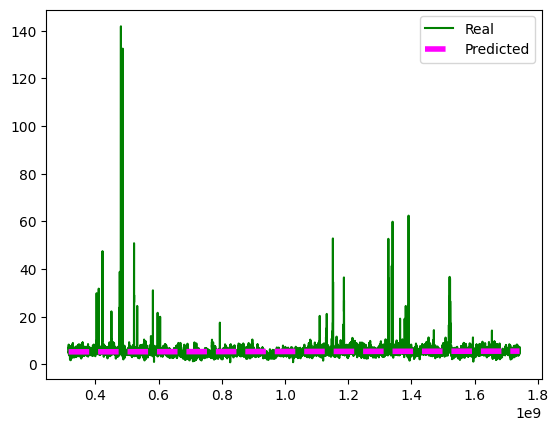

In [ ]:
_ = plt.plot(dpi=150)
plt.plot(X_train, y_train, c="green", label="Real")
plt.plot(X_train, y_pred, c="magenta", label="Predicted", linestyle="dashed", linewidth=4)
plt.legend(loc="upper right")
plt.show()

#Evaluation of the model Mean Squared Error and Mean Absolute Error

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_true=y_train, y_pred=y_pred)
mae = mean_absolute_error(y_true=y_train, y_pred=y_pred)

print(f"{mse=}")
print(f"{mae=}")

mse=7.051246656212377
mae=1.1468478227408034
